In [4]:
import numpy as np
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker
import scipy.signal
import scipy.optimize as op
import plasmapy
import matplotlib.cm as cm
from scipy import special as sp
from scipy import integrate
from prettytable import PrettyTable
from scipy import fftpack
from tqdm import tqdm
%config InlineBackend.figure_format = 'svg'

# Simulation of electron hole from two stream instabilities

In [23]:
T = 1
L = 10
k = 2*np.pi/L

vmax = 5 # 速度最大值
nx = 300
nv = 300
dx = L/(nx-1)
dv = 2*vmax/(nv-1)
x = np.linspace(0, L, num=nx, endpoint=True)
v = np.linspace(-vmax, vmax, num=nv, endpoint=True)
V,X=np.meshgrid(v,x)
dt = 0.01
max_steps  = 100
data_steps = max_steps
data_num = int(max_steps/data_steps)+1

path = '../data/'
print(data_num)
print('k=',k)
print('limited time=',2*np.pi/k/dv)
print('real time = ', max_steps*dt)

2
k= 0.6283185307179586
limited time= 299.0
real time =  1.0


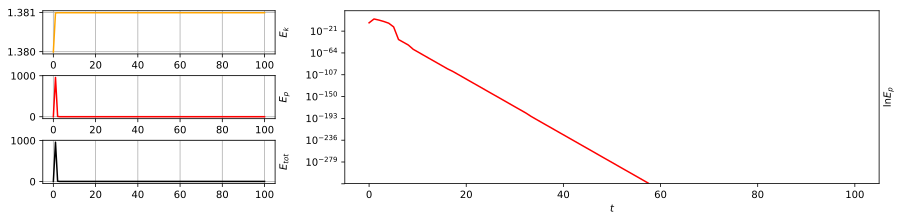

In [36]:
dataet = np.loadtxt(os.path.join(path,"tot_energy"))[0:max_steps]
dataep = np.loadtxt(os.path.join(path,"pot_energy"))[0:max_steps]
dataek = np.loadtxt(os.path.join(path,"kin_energy"))[0:max_steps]

t = np.linspace(0, max_steps, max_steps)
fig = plt.figure(figsize=(15, 3))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax1.plot(t, dataek, color='orange')
ax1.grid()
ax1.set_ylabel(r'$E_k$')
ax1.yaxis.set_label_position("right")

ax2 = plt.subplot2grid((3, 3), (1, 0))
ax2.plot(t, dataep, color='r')
ax2.grid()
ax2.set_ylabel(r'$E_p$')
ax2.yaxis.set_label_position("right")

ax3 = plt.subplot2grid((3, 3), (2, 0))
ax3.plot(t, dataet, color='black')
ax3.grid()
ax3.set_ylabel(r'$E_{tot}$')
ax3.yaxis.set_label_position("right")

axl2 = plt.subplot2grid((3, 3), (0, 1),colspan=2, rowspan=3)
axl2.plot(t, dataep, color='r')
axl2.set_ylabel(r'$\ln E_p$')
axl2.set_yscale('log')
axl2.yaxis.set_label_position("right")

fig.subplots_adjust(bottom=0.1, top=0.9, hspace=.5, wspace=.3)
plt.xlabel(r'$t$')
plt.show()

In [37]:
progesses = np.arange(0,data_num,1)

f = []
phi = []

for progess in progesses:
    f_temp = np.loadtxt(os.path.join(path,"data"+str(progess)))
    f.append(f_temp)
    phi_temp = np.loadtxt(os.path.join(path,"phi"+str(progess)))
    phi.append(phi_temp)

In [38]:
fx0 = np.sum(f[0],axis=1)*dv
fv0 = np.sum(f[0],axis=0)*dx/L
fx = np.sum(f[data_num-1],axis=1)*dv
fv = np.sum(f[data_num-1],axis=0)*dx/L

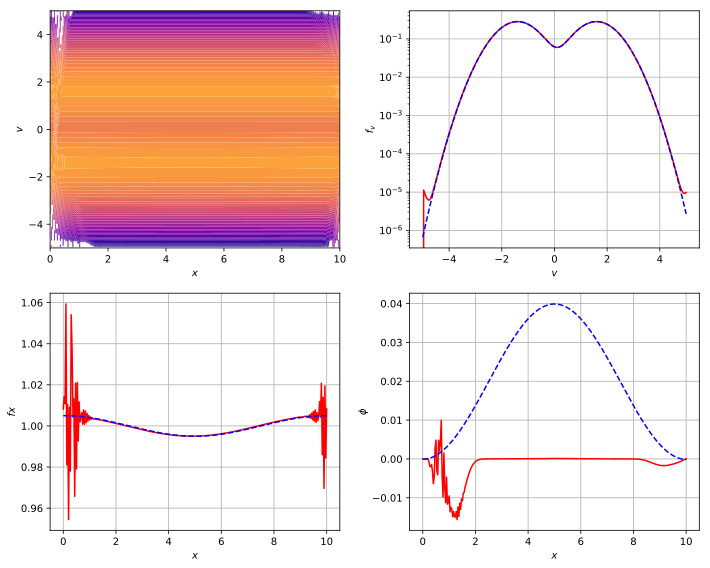

In [39]:
fig = plt.figure(figsize=(10, 8))

test_frame = 1
Z = f[test_frame]
fv = np.sum(Z, axis=0)*dx/L
Z_phi = phi[test_frame]
# Z[np.where(Z<1e-8)]=0
lvs_idx = np.linspace(-6,1,num=50)
lvs = 10**lvs_idx

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1cm = ax1.contourf(X, V, Z, levels=lvs,norm=colors.LogNorm(vmin=lvs.min(),vmax=lvs.max()),cmap=cm.plasma)
# ax1cm = ax1.contourf(X, V, Z, levels=20,cmap=cm.plasma)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$v$')
# ax1.set_ylim(4,6)

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(v, fv, color='red')
ax2.plot(v, fv0,'--', color='blue')
ax2.set_xlabel(r'$v$')
ax2.set_ylabel(r'$f_{v}$')
ax2.set_yscale('log')
ax2.grid()

ax3 = plt.subplot2grid((2, 2), (1, 0))
ax3.plot(x, fx, color='red')
ax3.plot(x, fx0,'--', color='blue')
ax2.set_xlabel(r'$v$')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$fx$')
ax3.grid()

ax4 = plt.subplot2grid((2, 2), (1, 1))
ax4.plot(x, Z_phi, color='red')
ax4.plot(x, phi[0],'--', color='blue')
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$\phi$')
ax4.grid()

plt.tight_layout()